**Value at Risk (VaR)**

Value at Risk (VaR) is a statistical measure used to assess the level of financial risk within a portfolio over a specific time frame. It estimates the maximum potential loss that a portfolio could incur with a given confidence level. For example, a 95% VaR of $1 million over one day means that there is a 5% chance that the portfolio could lose more than $1 million in a single day.

Another definition of VaR is that it estimates the maximum potential loss that a portfolio could incur with a given confidence level over a specified period. For example, a 95% VaR of $1 million over one day means that there is a 5% chance that the portfolio could lose more than $1 million in a single day.

**Key Components of VaR:**
1. **Time Horizon:** The period over which the risk is assessed (e.g., one day, one week, one month).
2. **Confidence Level:** The probability that the actual loss will not exceed the VaR estimate (e.g., 95%, 99%).
3. **Loss Amount:** The estimated maximum loss that could occur within the specified time horizon at the given confidence level.

In [1]:
# Library imports
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from typing import Dict, Tuple
import warnings
warnings.filterwarnings('ignore')

In [2]:
# portfolio data
portfolio = {
    'AAPL': 10,   # Apple Inc.
    'MSFT': 20,  # Microsoft Corporation
    'GOOGL': 20, # Alphabet Inc.
    'AMZN': 10,  # Amazon.com Inc.
    'TSLA': 15,  # Tesla Inc.
    'JNJ': 25,   # Johnson & Johnson
    'V': 40,     # Visa Inc.
    'NVDA': 35   # NVIDIA Corporation
}

In [3]:
# Define a function to fetch stock data
def download_stock_data(ticker, start_date, end_date):
    """ Download historical stock data from Yahoo Finance from start_date to end_date. """
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Ticker'] = ticker
    data.reset_index(inplace=True)
    columns_to_keep = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ticker']
    data.columns = columns_to_keep
    return pd.DataFrame(data)

# Fetch data for all stocks in the portfolio
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - pd.DateOffset(years=5)).strftime('%Y-%m-%d')
# Download data for all stocks in the portfolio
all_data = pd.concat([download_stock_data(ticker, start_date, end_date) for ticker in portfolio.keys()])
all_data.reset_index(drop=True, inplace=True)
# Display the first few rows of the data
print(all_data.head())
# Display the last few rows of the data
print(all_data.tail())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

        Date        Open        High         Low       Close     Volume Ticker
0 2020-09-21  107.076767  107.183767  100.287194  101.687910  195713800   AAPL
1 2020-09-22  108.759575  109.780932  106.181879  109.605842  183055400   AAPL
2 2020-09-23  104.197540  109.051400  103.857083  108.574771  150718700   AAPL
3 2020-09-24  105.267502  107.242117  102.135350  102.300710  167743300   AAPL
4 2020-09-25  109.216743  109.372382  104.732514  105.471782  149981400   AAPL
            Date        Open        High         Low       Close     Volume  \
10043 2025-09-15  177.750000  178.850006  174.509995  175.669998  147061600   
10044 2025-09-16  174.880005  177.500000  174.380005  177.000000  140737800   
10045 2025-09-17  170.289993  173.199997  168.410004  172.639999  211843800   
10046 2025-09-18  176.240005  177.100006  172.960007  173.979996  191763300   
10047 2025-09-19  176.669998  178.080002  175.179993  175.770004  236658800   

      Ticker  
10043   NVDA  
10044   NVDA  
10045 

In [4]:
# Save data to CSV
all_data.to_csv('portfolio_stock_data.csv', index=False)

Starting date: 2020-09-21, Ending date: 2025-09-21
Trading days: 1256


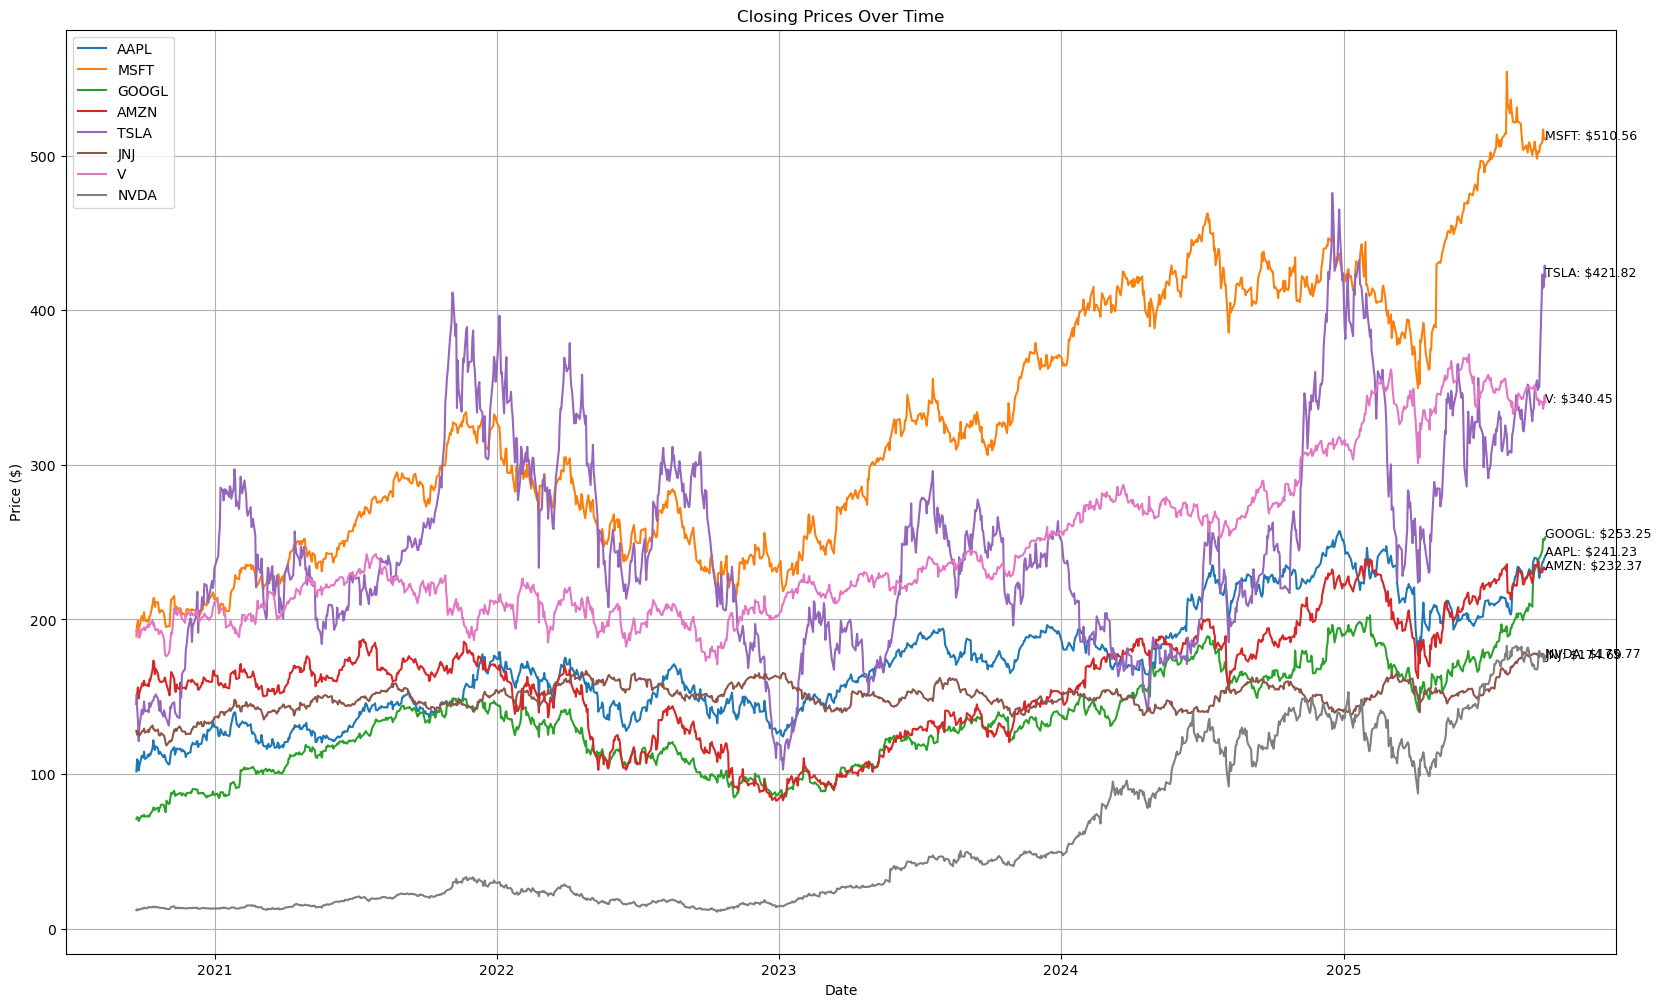

In [5]:
# Plot closing prices for each stock over time
print(f'Starting date: {start_date}, Ending date: {end_date}')
print(f'Trading days: {len(all_data["Date"].unique())}')
plt.figure(figsize=(20, 12))
for ticker in portfolio.keys():
    stock_data = all_data[all_data['Ticker'] == ticker]
    plt.plot(stock_data['Date'], stock_data['Close'], label=ticker)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')

# Display line with last closing price
for ticker in portfolio.keys():
    stock_data = all_data[all_data['Ticker'] == ticker]
    plt.text(stock_data['Date'].iloc[-1], stock_data['Close'].iloc[-1], f'{ticker}: ${stock_data["Close"].iloc[-1]:.2f}', fontsize=9)
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()

Calculate Current Portfolio Weights

In [6]:
# Calculate value-based weights
latest_prices = all_data.groupby('Ticker')['Close'].last()
portfolio_values = {ticker: shares * latest_prices[ticker] for ticker, shares in portfolio.items()}
total_portfolio_value = sum(portfolio_values.values())
portfolio_weights = {ticker: value / total_portfolio_value for ticker, value in portfolio_values.items()}
print("Portfolio Weights:")
for ticker, weight in portfolio_weights.items():
    print(f"{ticker}: {weight:.2%}")
# Create a valuation DataFrame
valuation_df = pd.DataFrame()
valuation_df['Ticker'] = list(portfolio.keys())
valuation_df['Shares'] = list(portfolio.values())
valuation_df['Current Price'] = latest_prices[portfolio.keys()].values
valuation_df['Market Value'] = valuation_df['Shares'] * valuation_df['Current Price']
valuation_df['Total Value'] = valuation_df['Market Value']
print(valuation_df)

Portfolio Weights:
AAPL: 4.78%
MSFT: 20.23%
GOOGL: 10.03%
AMZN: 4.60%
TSLA: 12.54%
JNJ: 8.65%
V: 26.98%
NVDA: 12.19%
  Ticker  Shares  Current Price  Market Value   Total Value
0   AAPL      10     241.229996   2412.299957   2412.299957
1   MSFT      20     510.559998  10211.199951  10211.199951
2  GOOGL      20     253.250000   5065.000000   5065.000000
3   AMZN      10     232.369995   2323.699951   2323.699951
4   TSLA      15     421.820007   6327.300110   6327.300110
5    JNJ      25     174.690002   4367.250061   4367.250061
6      V      40     340.450012  13618.000488  13618.000488
7   NVDA      35     175.770004   6151.950150   6151.950150


VaR Models:
1. **Historical Simulation:** Uses historical market data to simulate potential losses based on past price movements.
2. **Parametric (Variance-Covariance) Method:** Assumes that returns are normally distributed and uses statistical measures (mean and standard deviation) to estimate potential losses.
3. **Monte Carlo Simulation:** Uses random sampling and statistical modeling to simulate a wide range of possible outcomes for portfolio returns.

**Backtesting VaR:** Backtesting involves comparing the VaR estimates to actual portfolio losses over a historical period to assess the accuracy of the VaR model. This helps in validating the model and ensuring it provides reliable risk estimates.

In [7]:
# Calculate historical VaR
def calculate_historical_var(
        price_df: pd.DataFrame,
        weight_dict: Dict[str, float],
        portfolio_value: float,
        confidence_level: float = 0.95,
        period: str = 'daily',
        num_simulations: int = 10000
) -> Dict[str, float]:
    """
    Calculate the historical Value at Risk (VaR) for a portfolio.

    Parameters:
    - price_df: DataFrame with historical prices for each stock.
    - weight_dict: Dictionary with stock tickers as keys and their portfolio weights as values.
    - portfolio_value: Total value of the portfolio in dollars.
    - confidence_level: Confidence level for VaR calculation (default is 0.95).
    - period: Time period for VaR ('daily', 'weekly', 'monthly', 'annual').

    Returns:
    - Dictionary with VaR results and related information.
    """
    # 1. Calculate daily returns
    daily_returns = price_df.pct_change().dropna()

    # 2. Weight portfolio returns
    portfolio_returns = pd.DataFrame()
    for ticker, weight in weight_dict.items():
        if ticker in daily_returns.columns:
            portfolio_returns[ticker] = daily_returns[ticker] * weight
        else:
            raise ValueError(f"Ticker {ticker} not found in returns DataFrame.")
    portfolio_returns['Total'] = portfolio_returns.sum(axis=1)
    # 3. Resample returns based on the specified period
    if period.lower() == 'weekly':
        periodic_returns = portfolio_returns['Total'].resample('W').sum()
    elif period.lower() == 'monthly':
        periodic_returns = portfolio_returns['Total'].resample('M').sum()
    elif period.lower() == 'annual':
        periodic_returns = portfolio_returns['Total'].resample('Y').sum()
    else:
        periodic_returns = portfolio_returns['Total']
    # 4. Historical VaR (percentile)
    periodic_returns = periodic_returns.dropna()
    var_pct = np.percentile(periodic_returns.values, (1 - confidence_level) * 100)
    var_dollar = abs(var_pct) * portfolio_value
    # 5. Parametric VaR
    mean_return = periodic_returns.mean()
    std_dev = periodic_returns.std()
    z_score = stats.norm.ppf(1 - confidence_level) # Negative z-score for left tail (losses)
    parametric_var_pct = mean_return + z_score * std_dev
    parametric_var_dollar = abs(parametric_var_pct) * portfolio_value
    # 6. Monte Carlo VaR
    simulated_returns = np.random.normal(mean_return, std_dev, num_simulations)
    monte_carlo_var_pct = np.percentile(simulated_returns, (1 - confidence_level) * 100)
    monte_carlo_var_dollar = abs(monte_carlo_var_pct) * portfolio_value
    # 7. Backtest VaR
    hist_expected_losses = np.sum(periodic_returns <= var_pct)
    param_expected_losses = np.sum(periodic_returns <= parametric_var_pct)
    monte_carlo_expected_losses = np.sum(periodic_returns <= monte_carlo_var_pct)
    total_observations = len(periodic_returns)
    hist_expection_rate = hist_expected_losses / total_observations
    param_expection_rate = param_expected_losses / total_observations
    monte_carlo_expection_rate = monte_carlo_expected_losses / total_observations

    return {
        'portfolio_returns': periodic_returns,
        'confidence_level': confidence_level,
        'period': period,
        'var_percentage': var_pct,
        'var_dollar': var_dollar,
        'parametric_var_percentage': parametric_var_pct,
        'parametric_var_dollar': parametric_var_dollar,
        'monte_carlo_var_percentage': monte_carlo_var_pct,
        'monte_carlo_var_dollar': monte_carlo_var_dollar,
        'mean_return': mean_return,
        'std_dev': std_dev,
        'worst_case_scenario': periodic_returns.min(),
        'best_case_scenario': periodic_returns.max(),
        'hist_expected_losses': hist_expected_losses,
        'param_expected_losses': param_expected_losses,
        'monte_carlo_expected_losses': monte_carlo_expected_losses,
        'total_observations': total_observations,
        'hist_expection_rate': hist_expection_rate,
        'param_expection_rate': param_expection_rate,
        'monte_carlo_expection_rate': monte_carlo_expection_rate
    }
# Prepare returns DataFrame
price_df = all_data.pivot(index='Date', columns='Ticker', values='Close')
# Calculate and display VaR for different periods
for period in ['daily', 'weekly', 'monthly', 'annual']:
    var_results = calculate_historical_var(
        price_df=price_df,
        weight_dict=portfolio_weights,
        portfolio_value=total_portfolio_value,
        confidence_level=0.95,
        period=period
    )
    print(f"\nValue at Risk (VaR) - {period.capitalize()}:")
    print(f"- Confidence Level: {var_results['confidence_level']:.2%}")
    print(f"- Historical VaR Percentage: {var_results['var_percentage']:.2%}")
    print(f"- Historical VaR Dollar Amount: ${var_results['var_dollar']:.2f}")
    print(f"- Parametric VaR Percentage: {var_results['parametric_var_percentage']:.2%}")
    print(f"- Parametric VaR Dollar Amount: ${var_results['parametric_var_dollar']:.2f}")
    print(f"- Monte Carlo VaR Percentage: {var_results['monte_carlo_var_percentage']:.2%}")
    print(f"- Monte Carlo VaR Dollar Amount: ${var_results['monte_carlo_var_dollar']:.2f}")
    print(f"- Worst Case Scenario ({period.capitalize()} Return): {var_results['worst_case_scenario']:.2%}")
    print(f"- Best Case Scenario ({period.capitalize()} Return): {var_results['best_case_scenario']:.2%}")
    print(f"- Mean {period.capitalize()} Return: {var_results['mean_return']:.2%}")
    print(f"- Standard Deviation of {period.capitalize()} Returns: {var_results['std_dev']:.2%}")
    print(f"- Total Observations: {var_results['total_observations']}")
    print(f"- Historical Expected Losses: {var_results['hist_expected_losses']} (Rate: {var_results['hist_expection_rate']:.2%})")
    print(f"- Parametric Expected Losses: {var_results['param_expected_losses']} (Rate: {var_results['param_expection_rate']:.2%})")
    print(f"- Monte Carlo Expected Losses: {var_results['monte_carlo_expected_losses']} (Rate: {var_results['monte_carlo_expection_rate']:.2%})")  
    


Value at Risk (VaR) - Daily:
- Confidence Level: 95.00%
- Historical VaR Percentage: -2.51%
- Historical VaR Dollar Amount: $1268.42
- Parametric VaR Percentage: -2.48%
- Parametric VaR Dollar Amount: $1252.60
- Monte Carlo VaR Percentage: -2.49%
- Monte Carlo VaR Dollar Amount: $1257.00
- Worst Case Scenario (Daily Return): -8.31%
- Best Case Scenario (Daily Return): 9.04%
- Mean Daily Return: 0.11%
- Standard Deviation of Daily Returns: 1.58%
- Total Observations: 1255
- Historical Expected Losses: 63 (Rate: 5.02%)
- Parametric Expected Losses: 64 (Rate: 5.10%)
- Monte Carlo Expected Losses: 64 (Rate: 5.10%)

Value at Risk (VaR) - Weekly:
- Confidence Level: 95.00%
- Historical VaR Percentage: -4.48%
- Historical VaR Dollar Amount: $2262.07
- Parametric VaR Percentage: -3.96%
- Parametric VaR Dollar Amount: $1998.95
- Monte Carlo VaR Percentage: -4.02%
- Monte Carlo VaR Dollar Amount: $2029.49
- Worst Case Scenario (Weekly Return): -7.40%
- Best Case Scenario (Weekly Return): 7.51%


Interpretation:
- The VaR values indicate the potential losses at a 95% confidence level for different time horizons.
- The historical VaR is based on actual past returns, while the parametric and Monte Carlo VaR are based on statistical models.
- The worst-case and best-case scenarios provide insights into the range of possible returns.

Analysis the results:
- Daily VaR estimates suggest that on most days, the portfolio is unlikely to lose more than approximately 2.5% of its value, which translates to around $1,268.42. This indicates a relatively moderate level of daily risk. Historical expected losses of 63 out of 1255 observations (5.02%) align well with the 95% confidence level, suggesting that the historical VaR model is reasonably accurate. Parametric and Monte Carlo VaR estimates are very close to the historical VaR, indicating that the assumption of normally distributed returns is valid for this portfolio. Monte Carlo simulation also supports this finding, with a similar expected loss rate of 5.10%.
- Monthly VaR estimates indicate that the portfolio could lose up to approximately 7.73% of its value in a month, equating to around $3,900.49. This higher percentage reflects the increased risk over a longer time horizon. The historical expected losses of 4 out of 61 observations (6.56%) are slightly higher than the 5% threshold, suggesting that the historical VaR model may be slightly underestimating risk in this case. However, the parametric and Monte Carlo VaR estimates are close to each other and slightly lower than the historical VaR, indicating that the normality assumption may still hold reasonably well for monthly returns. Both models show an expected loss rate of 6.56%, which is consistent with the historical data.
- Annual VaR estimates show a significant increase in potential losses, with the portfolio possibly losing up to 18.33% of its value, or about $9,252.66, over a year. This reflects the higher uncertainty and risk associated with longer time horizons. The historical expected losses of 1 out of 6 observations (16.67%) are notably higher than the 5% threshold, indicating that the historical VaR model may be underestimating risk for annual returns. The parametric and Monte Carlo VaR estimates are substantially higher than the historical VaR, suggesting that the assumption of normally distributed returns may not be appropriate for annual returns. Both models indicate an expected loss rate of 16.67%, which is significantly above the 5% level, highlighting potential limitations in the VaR models for long-term risk assessment.

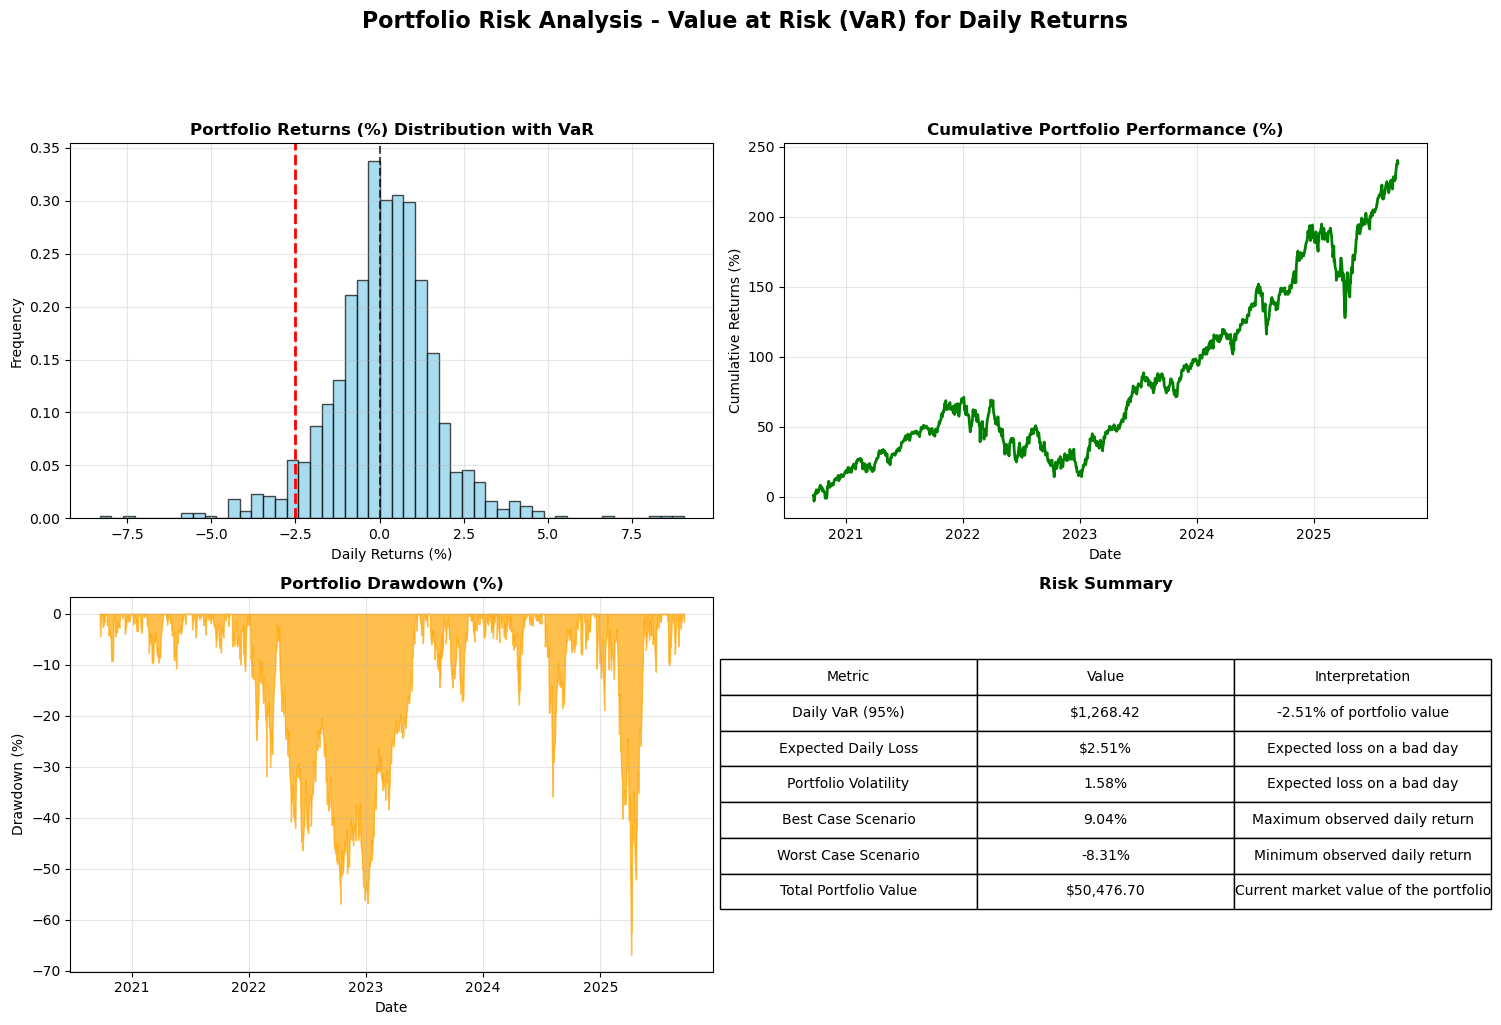

In [8]:
# Visualize portfolio risk analysis for daily returns
daily_var = calculate_historical_var(
        price_df=price_df,
        weight_dict=portfolio_weights,
        portfolio_value=total_portfolio_value,
        confidence_level=0.95,
        period='daily')
# Visualize portfolio analysis
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Portfolio Risk Analysis - Value at Risk (VaR) for Daily Returns', fontsize=16, fontweight='bold', y=1.02)

# Returns distribution with VaR lines
ax[0, 0].hist(daily_var['portfolio_returns']*100, bins=50, color='skyblue', edgecolor='black', density=True, alpha=0.7)
ax[0, 0].axvline(daily_var['var_percentage']*100, color='red', linestyle='--', linewidth=2, label=f'VaR (95%): {daily_var["var_percentage"]*100:.2f}%')
ax[0, 0].axvline(0, color='black', linestyle='--', alpha=0.7)
ax[0, 0].set_title('Portfolio Returns (%) Distribution with VaR', fontweight='bold')
ax[0, 0].set_xlabel('Daily Returns (%)')
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].grid(True, alpha=0.3)

# Cumulative portfolio performance
cumulative_returns = (1 + daily_var['portfolio_returns']).cumprod() - 1
ax[0, 1].plot(cumulative_returns.index, cumulative_returns*100, color='green', linewidth=2)
ax[0, 1].set_title('Cumulative Portfolio Performance (%)', fontweight='bold')
ax[0, 1].set_xlabel('Date')
ax[0, 1].set_ylabel('Cumulative Returns (%)')
ax[0, 1].grid(True, alpha=0.3)

# Drawdown analysis
running_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - running_max) * 100
ax[1, 0].fill_between(drawdown.index, drawdown, color='orange', alpha=0.7)
ax[1, 0].set_title('Portfolio Drawdown (%)', fontweight='bold')
ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('Drawdown (%)')
ax[1, 0].grid(True, alpha=0.3)
# Risk summary table
risk_table_data = [
    ['Metric', 'Value', 'Interpretation'],
    ['Daily VaR (95%)', f'${daily_var["var_dollar"]:,.2f}', f'{daily_var["var_percentage"]*100:.2f}% of portfolio value'],
    ['Expected Daily Loss', f'${(daily_var["var_dollar"]/total_portfolio_value)*100:.2f}%', 'Expected loss on a bad day'],
    ['Portfolio Volatility', f'{daily_var["portfolio_returns"].std()*100:.2f}%', 'Expected loss on a bad day'],
    ['Best Case Scenario', f'{daily_var["best_case_scenario"]*100:.2f}%', 'Maximum observed daily return'],
    ['Worst Case Scenario', f'{daily_var["worst_case_scenario"]*100:.2f}%', 'Minimum observed daily return'],
    ['Total Portfolio Value', f'${total_portfolio_value:,.2f}', 'Current market value of the portfolio']
]
table = ax[1, 1].table(cellText=risk_table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2)
ax[1, 1].set_title('Risk Summary', fontweight='bold')
ax[1, 1].axis('off')
# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


- The historical VaR indicates that there is a 5% chance that the portfolio could lose more than $1268.42 in a single day. Daily returns range from a worst-case scenario of -8.31% to a best-case scenario of 9.04%. At a 95% confidence level, the portfolio is expected to lose no more than 2.51% of its value on any given day.
- The line chart shows portfolio cumulative returns over time, starting from 0%. The portfolio experienced fluctuations, with periods of both gains and losses. The curve rises when the portfolio value increases and falls during downturns, flatting out during stable periods. Overall, the chart illustrates the portfolio's performance and volatility over the analyzed period. It is a big picture of the portfolio's growth and risk dynamics.
- Portfolio drawdown is the pecentage decline from a historical peak in portfolio value. It measures the extent of losses experienced by the portfolio during downturns. The drawdown chart shows the percentage drop from the highest point to the lowest point over time, indicating periods of significant losses. Value a negative percentage -68.00% means the portfolio lost 68% of its value from its peak during that period.
- Daily Var (95% confidence level): The dollar and % loss expected on 5% of trading days.
- Expected daily loss: The average loss on days when the portfolio experiences a loss.
- Best/Worst daily return: The highest and lowest daily returns observed in the portfolio's history.
- Total poortfolio value: The current total value of the portfolio.

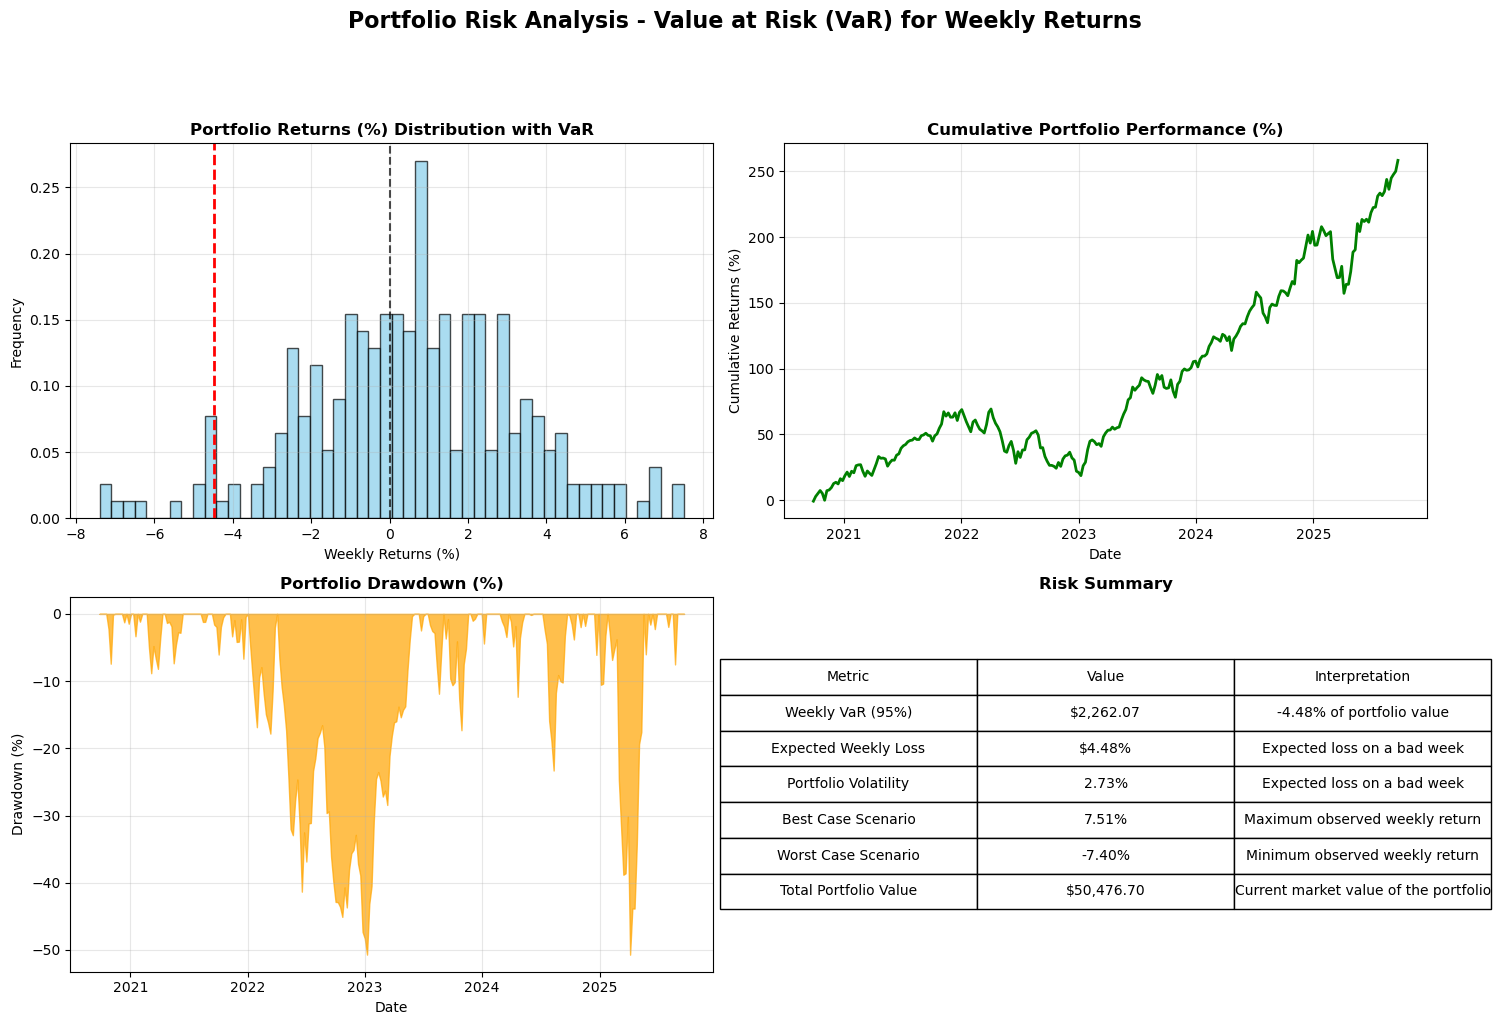

In [9]:
# Visualize portfolio risk analysis for weekly returns
weekly_var = calculate_historical_var(
        price_df=price_df,
        weight_dict=portfolio_weights,
        portfolio_value=total_portfolio_value,
        confidence_level=0.95,
        period='weekly')
# Visualize portfolio analysis
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Portfolio Risk Analysis - Value at Risk (VaR) for Weekly Returns', fontsize=16, fontweight='bold', y=1.02)

# Returns distribution with VaR lines
ax[0, 0].hist(weekly_var['portfolio_returns']*100, bins=50, color='skyblue', edgecolor='black', density=True, alpha=0.7)
ax[0, 0].axvline(weekly_var['var_percentage']*100, color='red', linestyle='--', linewidth=2, label=f'VaR (95%): {weekly_var["var_percentage"]*100:.2f}%')
ax[0, 0].axvline(0, color='black', linestyle='--', alpha=0.7)
ax[0, 0].set_title('Portfolio Returns (%) Distribution with VaR', fontweight='bold')
ax[0, 0].set_xlabel('Weekly Returns (%)')
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].grid(True, alpha=0.3)

# Cumulative portfolio performance
cumulative_returns = (1 + weekly_var['portfolio_returns']).cumprod() - 1
ax[0, 1].plot(cumulative_returns.index, cumulative_returns*100, color='green', linewidth=2)
ax[0, 1].set_title('Cumulative Portfolio Performance (%)', fontweight='bold')
ax[0, 1].set_xlabel('Date')
ax[0, 1].set_ylabel('Cumulative Returns (%)')
ax[0, 1].grid(True, alpha=0.3)

# Drawdown analysis
running_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - running_max) * 100
ax[1, 0].fill_between(drawdown.index, drawdown, color='orange', alpha=0.7)
ax[1, 0].set_title('Portfolio Drawdown (%)', fontweight='bold')
ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('Drawdown (%)')
ax[1, 0].grid(True, alpha=0.3)
# Risk summary table
risk_table_data = [
    ['Metric', 'Value', 'Interpretation'],
    ['Weekly VaR (95%)', f'${weekly_var["var_dollar"]:,.2f}', f'{weekly_var["var_percentage"]*100:.2f}% of portfolio value'],
    ['Expected Weekly Loss', f'${(weekly_var["var_dollar"]/total_portfolio_value)*100:.2f}%', 'Expected loss on a bad week'],
    ['Portfolio Volatility', f'{weekly_var["portfolio_returns"].std()*100:.2f}%', 'Expected loss on a bad week'],
    ['Best Case Scenario', f'{weekly_var["best_case_scenario"]*100:.2f}%', 'Maximum observed weekly return'],
    ['Worst Case Scenario', f'{weekly_var["worst_case_scenario"]*100:.2f}%', 'Minimum observed weekly return'],
    ['Total Portfolio Value', f'${total_portfolio_value:,.2f}', 'Current market value of the portfolio']
]
table = ax[1, 1].table(cellText=risk_table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2)
ax[1, 1].set_title('Risk Summary', fontweight='bold')
ax[1, 1].axis('off')
# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

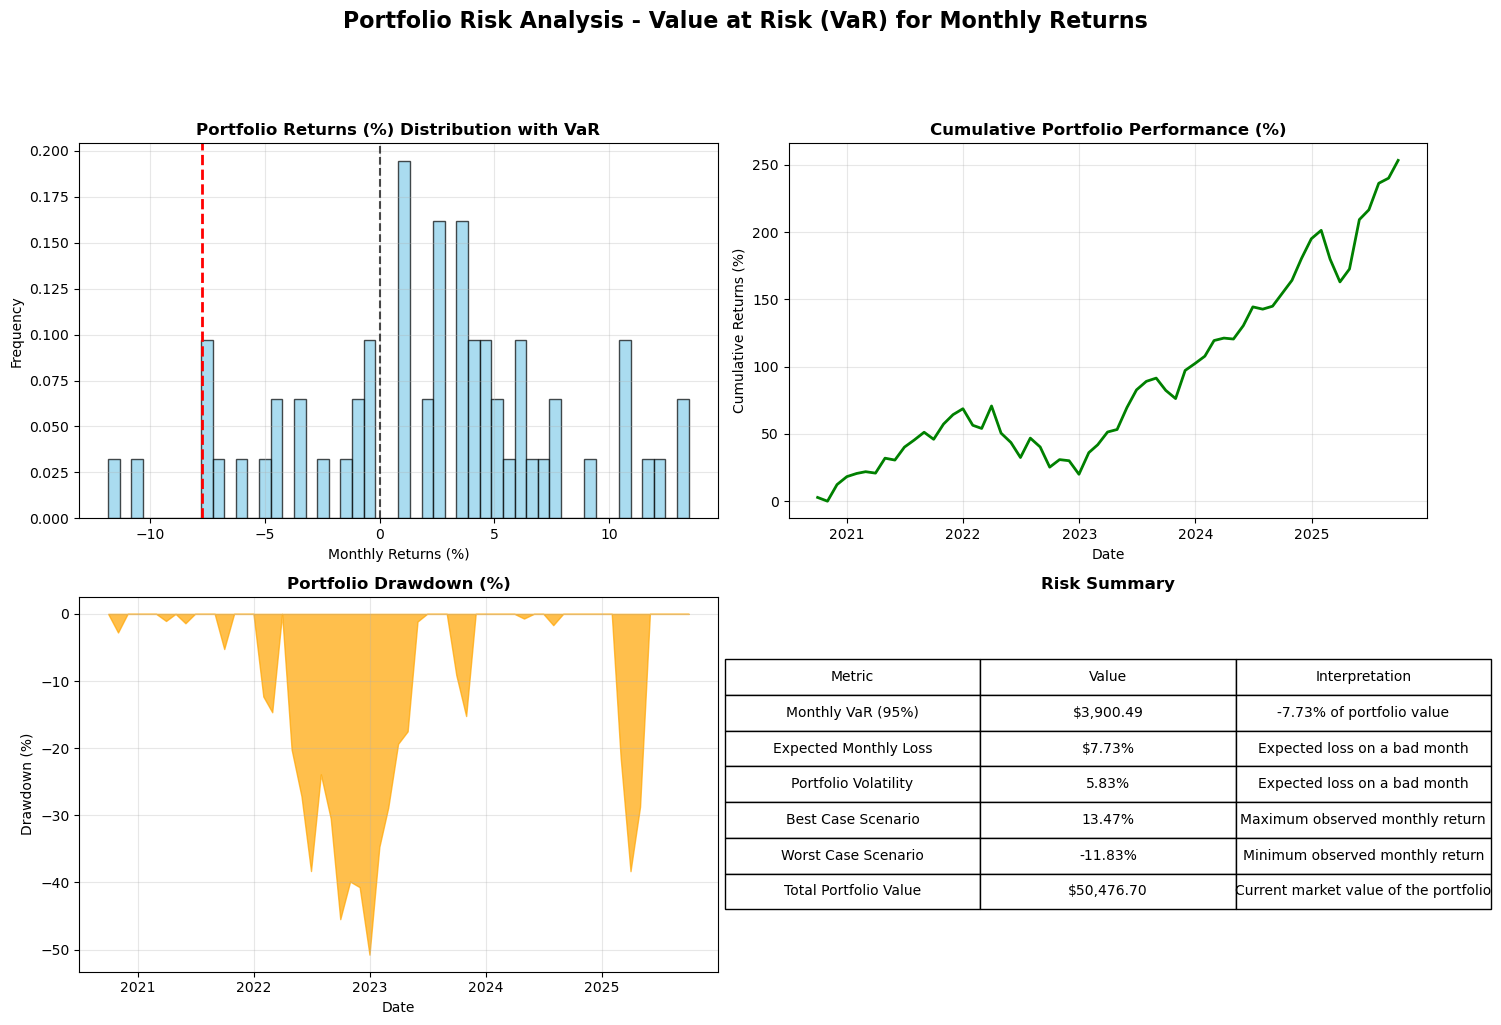

In [10]:
# Visualize portfolio risk analysis for monthly returns
monthly_var = calculate_historical_var(
        price_df=price_df,
        weight_dict=portfolio_weights,
        portfolio_value=total_portfolio_value,
        confidence_level=0.95,
        period='monthly')
# Visualize portfolio analysis
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Portfolio Risk Analysis - Value at Risk (VaR) for Monthly Returns', fontsize=16, fontweight='bold', y=1.02)

# Returns distribution with VaR lines
ax[0, 0].hist(monthly_var['portfolio_returns']*100, bins=50, color='skyblue', edgecolor='black', density=True, alpha=0.7)
ax[0, 0].axvline(monthly_var['var_percentage']*100, color='red', linestyle='--', linewidth=2, label=f'VaR (95%): {monthly_var["var_percentage"]*100:.2f}%')
ax[0, 0].axvline(0, color='black', linestyle='--', alpha=0.7)
ax[0, 0].set_title('Portfolio Returns (%) Distribution with VaR', fontweight='bold')
ax[0, 0].set_xlabel('Monthly Returns (%)')
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].grid(True, alpha=0.3)

# Cumulative portfolio performance
cumulative_returns = (1 + monthly_var['portfolio_returns']).cumprod() - 1
ax[0, 1].plot(cumulative_returns.index, cumulative_returns*100, color='green', linewidth=2)
ax[0, 1].set_title('Cumulative Portfolio Performance (%)', fontweight='bold')
ax[0, 1].set_xlabel('Date')
ax[0, 1].set_ylabel('Cumulative Returns (%)')
ax[0, 1].grid(True, alpha=0.3)

# Drawdown analysis
running_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - running_max) * 100
ax[1, 0].fill_between(drawdown.index, drawdown, color='orange', alpha=0.7)
ax[1, 0].set_title('Portfolio Drawdown (%)', fontweight='bold')
ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('Drawdown (%)')
ax[1, 0].grid(True, alpha=0.3)
# Risk summary table
risk_table_data = [
    ['Metric', 'Value', 'Interpretation'],
    ['Monthly VaR (95%)', f'${monthly_var["var_dollar"]:,.2f}', f'{monthly_var["var_percentage"]*100:.2f}% of portfolio value'],
    ['Expected Monthly Loss', f'${(monthly_var["var_dollar"]/total_portfolio_value)*100:.2f}%', 'Expected loss on a bad month'],
    ['Portfolio Volatility', f'{monthly_var["portfolio_returns"].std()*100:.2f}%', 'Expected loss on a bad month'],
    ['Best Case Scenario', f'{monthly_var["best_case_scenario"]*100:.2f}%', 'Maximum observed monthly return'],
    ['Worst Case Scenario', f'{monthly_var["worst_case_scenario"]*100:.2f}%', 'Minimum observed monthly return'],
    ['Total Portfolio Value', f'${total_portfolio_value:,.2f}', 'Current market value of the portfolio']
]
table = ax[1, 1].table(cellText=risk_table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2)
ax[1, 1].set_title('Risk Summary', fontweight='bold')
ax[1, 1].axis('off')
# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

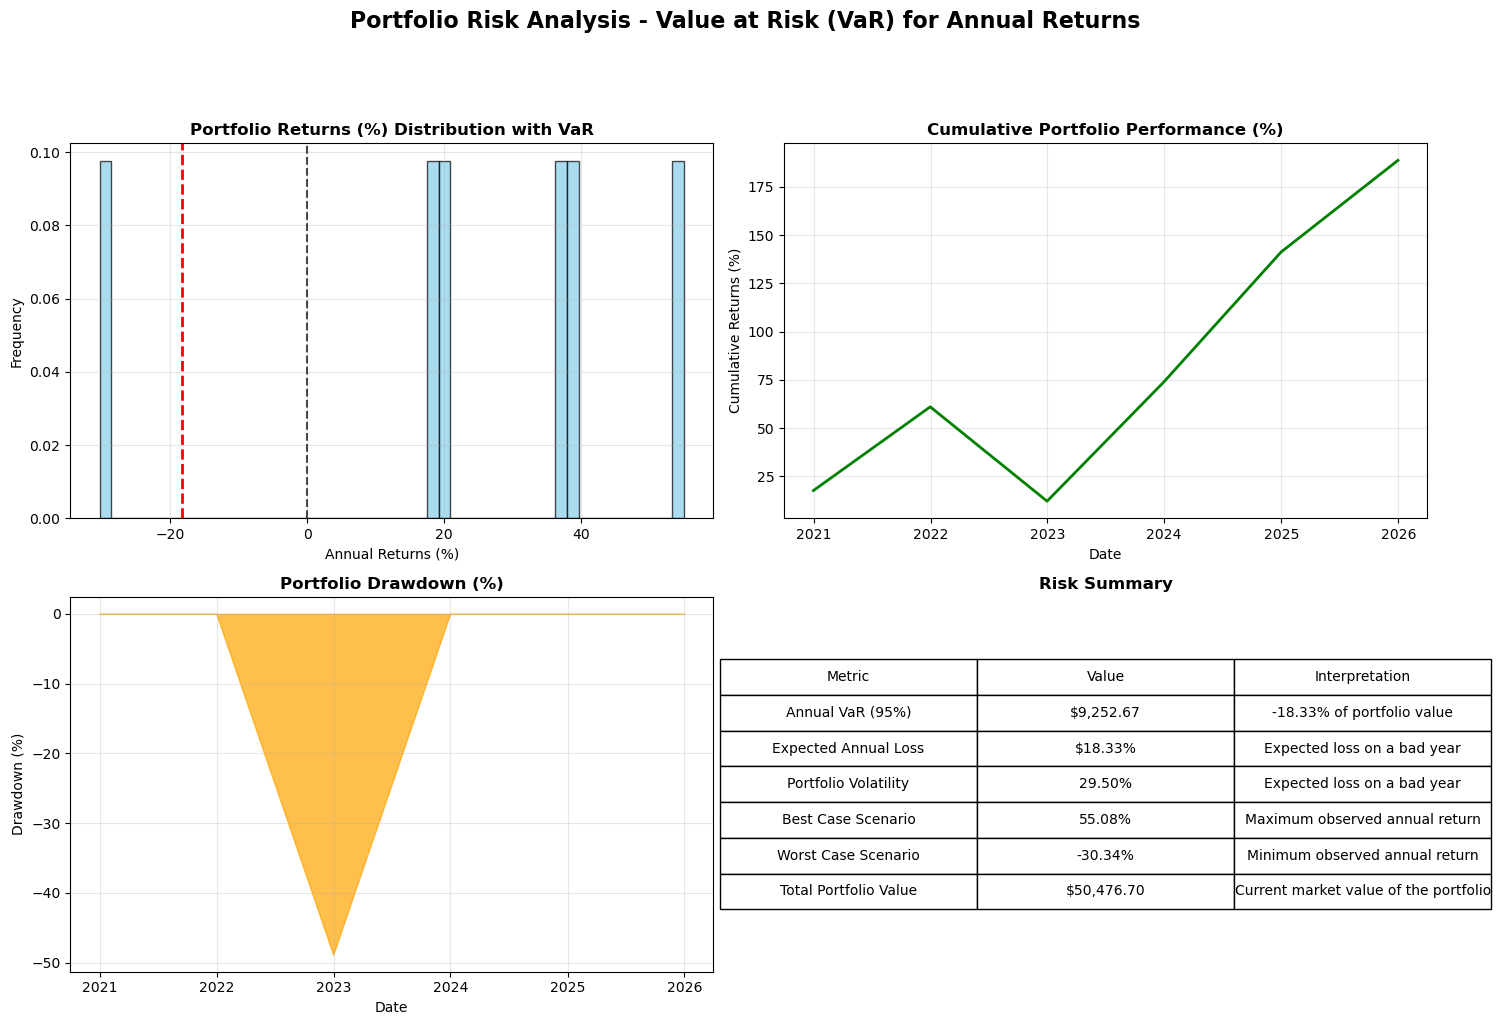

In [11]:
# Visualize portfolio risk analysis for annual returns
annual_var = calculate_historical_var(
        price_df=price_df,
        weight_dict=portfolio_weights,
        portfolio_value=total_portfolio_value,
        confidence_level=0.95,
        period='annual')
# Visualize portfolio analysis
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Portfolio Risk Analysis - Value at Risk (VaR) for Annual Returns', fontsize=16, fontweight='bold', y=1.02)

# Returns distribution with VaR lines
ax[0, 0].hist(annual_var['portfolio_returns']*100, bins=50, color='skyblue', edgecolor='black', density=True, alpha=0.7)
ax[0, 0].axvline(annual_var['var_percentage']*100, color='red', linestyle='--', linewidth=2, label=f'VaR (95%): {annual_var["var_percentage"]*100:.2f}%')
ax[0, 0].axvline(0, color='black', linestyle='--', alpha=0.7)
ax[0, 0].set_title('Portfolio Returns (%) Distribution with VaR', fontweight='bold')
ax[0, 0].set_xlabel('Annual Returns (%)')
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].grid(True, alpha=0.3)

# Cumulative portfolio performance
cumulative_returns = (1 + annual_var['portfolio_returns']).cumprod() - 1
ax[0, 1].plot(cumulative_returns.index, cumulative_returns*100, color='green', linewidth=2)
ax[0, 1].set_title('Cumulative Portfolio Performance (%)', fontweight='bold')
ax[0, 1].set_xlabel('Date')
ax[0, 1].set_ylabel('Cumulative Returns (%)')
ax[0, 1].grid(True, alpha=0.3)

# Drawdown analysis
running_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - running_max) * 100
ax[1, 0].fill_between(drawdown.index, drawdown, color='orange', alpha=0.7)
ax[1, 0].set_title('Portfolio Drawdown (%)', fontweight='bold')
ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('Drawdown (%)')
ax[1, 0].grid(True, alpha=0.3)
# Risk summary table
risk_table_data = [
    ['Metric', 'Value', 'Interpretation'],
    ['Annual VaR (95%)', f'${annual_var["var_dollar"]:,.2f}', f'{annual_var["var_percentage"]*100:.2f}% of portfolio value'],
    ['Expected Annual Loss', f'${(annual_var["var_dollar"]/total_portfolio_value)*100:.2f}%', 'Expected loss on a bad year'],
    ['Portfolio Volatility', f'{annual_var["portfolio_returns"].std()*100:.2f}%', 'Expected loss on a bad year'],
    ['Best Case Scenario', f'{annual_var["best_case_scenario"]*100:.2f}%', 'Maximum observed annual return'],
    ['Worst Case Scenario', f'{annual_var["worst_case_scenario"]*100:.2f}%', 'Minimum observed annual return'],
    ['Total Portfolio Value', f'${total_portfolio_value:,.2f}', 'Current market value of the portfolio']
]
table = ax[1, 1].table(cellText=risk_table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2)
ax[1, 1].set_title('Risk Summary', fontweight='bold')
ax[1, 1].axis('off')
# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()